In [453]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1)

In [454]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Loading Data

In [455]:
df0 = pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 7/anneal_data_final.csv')
df0

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


## 2) PreProcessing 

In [456]:
for i in df0.columns:
  if len(df0[df0[i]== '?']) > 0.25*len(df0):
    df0 = df0.drop(columns = [i],axis =1)

df0    

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
794,C,?,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [457]:
for i in range(len(df0)):
  if(df0['steel'][i]=='?'):
    df0['steel'][i] = np.nan

<ipython-input-457-71e96b1b26e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['steel'][i] = np.nan


In [458]:
df0 = df0.dropna()
df0

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,C,R,0,0,0,COIL,0.900,966.0,0,0,3
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [459]:
df0.isnull().sum()

product-type    0
steel           0
carbon          0
hardness        0
strength        0
shape           0
thick           0
width           0
len             0
bore            0
classes         0
dtype: int64

### Correlation Heatmap

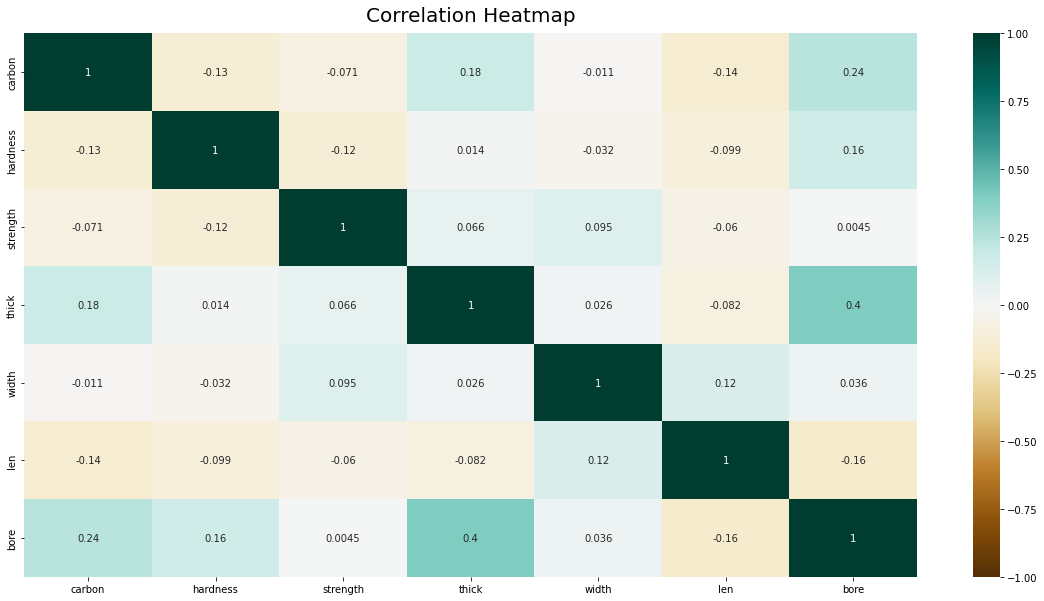

In [460]:
corr = df0.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [461]:
from sklearn.preprocessing import LabelEncoder as le
arr2=le()
for i in df0.columns:
  if(df0[i].dtype=="object"):
    df0[i]=arr2.fit_transform(df0[i])
df0

<ipython-input-461-2feeae69bc8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0[i]=arr2.fit_transform(df0[i])
<ipython-input-461-2feeae69bc8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0[i]=arr2.fit_transform(df0[i])
<ipython-input-461-2feeae69bc8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,0,0,8,0,0,0,0.700,610.0,0,0,2
1,0,3,0,0,0,0,3.200,610.0,0,0,2
2,0,3,0,0,0,1,0.700,1300.0,762,0,2
3,0,0,0,60,0,0,2.801,385.1,0,0,2
4,0,0,0,60,0,1,0.801,255.0,269,0,2
...,...,...,...,...,...,...,...,...,...,...,...
792,0,3,0,0,0,0,0.900,966.0,0,0,2
793,0,0,0,50,0,0,1.001,50.0,0,0,2
795,0,0,0,0,0,0,0.400,609.9,0,0,2
796,0,0,0,0,0,1,3.200,610.0,4880,0,2


In [462]:
df0.isnull().sum()

product-type    0
steel           0
carbon          0
hardness        0
strength        0
shape           0
thick           0
width           0
len             0
bore            0
classes         0
dtype: int64

In [463]:
df = df0.copy()
df1 = df.drop(columns=['classes'],axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)
df2 = pd.DataFrame(df2, columns=df1.columns)

df2

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,0.0,-0.813550,0.290026,-0.478595,-0.260364,-1.083113,-0.584540,-0.437242,-0.677387,-0.234004
1,0.0,1.010673,-0.274328,-0.478595,-0.260364,-1.083113,2.309846,-0.437242,-0.677387,-0.234004
2,0.0,1.010673,-0.274328,-0.478595,-0.260364,0.923264,-0.584540,1.273060,-0.275936,-0.234004
3,0.0,-0.813550,-0.274328,1.936774,-0.260364,-1.083113,1.847902,-0.994701,-0.677387,-0.234004
4,0.0,-0.813550,-0.274328,1.936774,-0.260364,0.923264,-0.467607,-1.317179,-0.535667,-0.234004
...,...,...,...,...,...,...,...,...,...,...
723,0.0,1.010673,-0.274328,-0.478595,-0.260364,-1.083113,-0.352989,0.445175,-0.677387,-0.234004
724,0.0,-0.813550,-0.274328,1.534213,-0.260364,-1.083113,-0.236056,-1.825312,-0.677387,-0.234004
725,0.0,-0.813550,-0.274328,-0.478595,-0.260364,-1.083113,-0.931867,-0.437489,-0.677387,-0.234004
726,0.0,-0.813550,-0.274328,-0.478595,-0.260364,0.923264,2.309846,-0.437242,1.893582,-0.234004


### Visualising Data

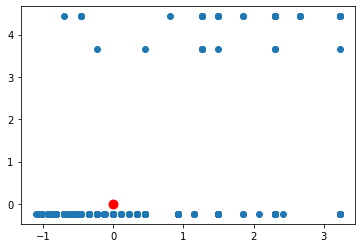

In [464]:
m1 = np.mean(df2['thick'])
m2 = np.mean(df2['bore'])
plt.scatter(m1,m2,c='r',s = 80)
plt.scatter(df2['thick'],df2['bore'])
plt.show()

## WITH STANDARDISATION

## 3) Three Classifier - SVM , Bagging , Random Forest

In [465]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df2, df['classes'], test_size=0.35)

### SVM classifier

In [466]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier1 = SVC()
classifier1.fit(X_train, y_train)
y_pred_svm = classifier1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy of SVM classifier:', accuracy*100 ," %")

Accuracy of SVM classifier: 80.7843137254902  %


### Bagging Classifier

In [467]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred_BC = bagging.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_BC)
print('Accuracy of Bagging classifier:', accuracy1*100 ," %")

Accuracy of Bagging classifier: 86.66666666666667  %


### Random Froest Classifier

In [468]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred_RF = clf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_RF)
print('Accuracy of Random Forest classifier:', accuracy2*100 ," %")

Accuracy of Random Forest classifier: 89.01960784313725  %


### SVM Classifier 5-fold CV

In [469]:
from sklearn.model_selection import KFold

X = df2
y = df['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_svm = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = SVC()
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_svm.append(acc1)
    # RocCurveDisplay.from_predictions(y_test,pred_values)
avg_acc = sum(accuracy_svm)/k
max_acc=max(accuracy_svm)

print('Array of accuracies : ')
print(accuracy_svm)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.8013698630136986, 0.8082191780821918, 0.815068493150685, 0.8, 0.8206896551724138]
Average ACC overall :
0.8090694378837979
Maximum ACC overall :
0.8206896551724138


### Bagging Classifier 5 fold CV

In [470]:
from sklearn.model_selection import KFold

X = df2
y = df['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_BC = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = BaggingClassifier(max_samples=0.5, max_features=0.5)
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_BC.append(acc1)
avg_acc = sum(accuracy_BC)/k
max_acc=max(accuracy_BC)

print('Array of accuracies : ')
print(accuracy_BC)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.9041095890410958, 0.8767123287671232, 0.8972602739726028, 0.8827586206896552, 0.8896551724137931]
Average ACC overall :
0.890099196976854
Maximum ACC overall :
0.9041095890410958


### Random Froest Classifier 5 fold CV


In [471]:
from sklearn.model_selection import KFold

X = df2
y = df['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_RF = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = RandomForestClassifier(n_estimators=10)
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_RF.append(acc1)
avg_acc = sum(accuracy_RF)/k
max_acc=max(accuracy_RF)

print('Array of accuracies : ')
print(accuracy_RF)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.910958904109589, 0.8972602739726028, 0.8835616438356164, 0.9379310344827586, 0.8827586206896552]
Average ACC overall :
0.9024940954180444
Maximum ACC overall :
0.9379310344827586


### Cross Validation Plots

Text(0.5, 1.0, 'Cross Validation plot')

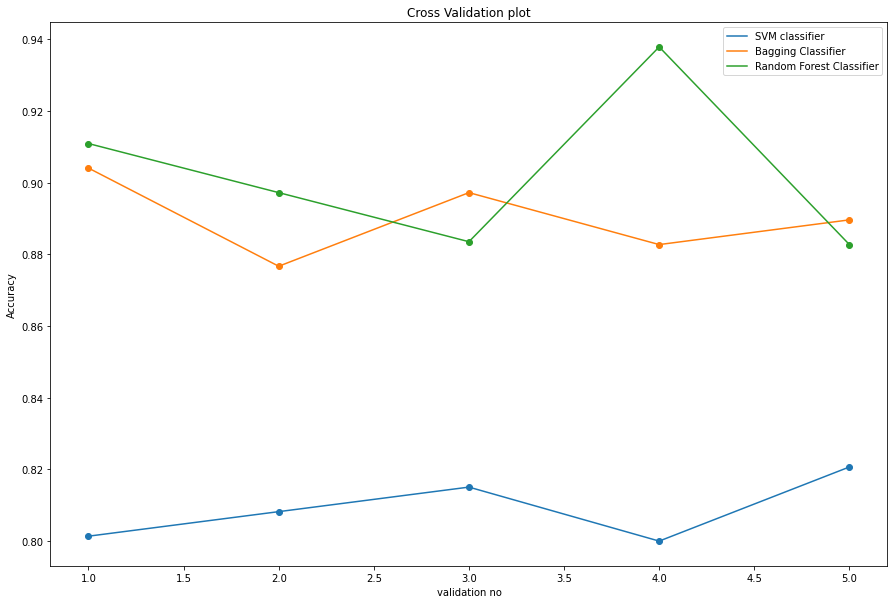

In [472]:
plt.figure(figsize=(15,10))
plt.plot(x,accuracy_svm, label = "SVM classifier")
plt.plot(x,accuracy_BC , label = "Bagging Classifier")
plt.plot(x,accuracy_RF, label = "Random Forest Classifier")
plt.scatter(x,accuracy_svm)
plt.scatter(x,accuracy_BC)
plt.scatter(x,accuracy_RF)
plt.legend()
plt.xlabel("validation no")
plt.ylabel("Accuracy")
plt.title("Cross Validation plot")

## WITHOUT STANDARDISATION

## 3) Three Classifier - SVM , Bagging , Random Forest

In [473]:
from sklearn.model_selection import train_test_split
df4 = df0.drop(columns =['classes'],axis = 1)
X_train,X_test,y_train,y_test= train_test_split(df4, df0['classes'], test_size=0.35)

### SVM classifier

In [474]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier1 = SVC()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SVM classifier:', accuracy*100 ," %")

Accuracy of SVM classifier: 74.90196078431373  %


### Bagging Classifier

In [475]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred1 = bagging.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print('Accuracy of Bagging classifier:', accuracy1*100 ," %")

Accuracy of Bagging classifier: 87.45098039215686  %


### Random Froest Classifier

In [476]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy of Random Forest classifier:', accuracy2*100 ," %")

Accuracy of Random Forest classifier: 89.80392156862746  %


### SVM Classifier 5-fold CV

In [477]:
from sklearn.model_selection import KFold

X = df4
y = df0['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_svm = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = SVC()
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_svm.append(acc1)
    # RocCurveDisplay.from_predictions(y_test,pred_values)
avg_acc = sum(accuracy_svm)/k
max_acc=max(accuracy_svm)

print('Array of accuracies : ')
print(accuracy_svm)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.7465753424657534, 0.7328767123287672, 0.7602739726027398, 0.8137931034482758, 0.7931034482758621]
Average ACC overall :
0.7693245158242796
Maximum ACC overall :
0.8137931034482758


### Bagging Classifier 5 fold CV

In [478]:
from sklearn.model_selection import KFold

X = df4
y = df0['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_BC = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = BaggingClassifier(max_samples=0.5, max_features=0.5)
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_BC.append(acc1)
avg_acc = sum(accuracy_BC)/k
max_acc=max(accuracy_BC)

print('Array of accuracies : ')
print(accuracy_BC)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.8493150684931506, 0.8835616438356164, 0.9041095890410958, 0.8689655172413793, 0.8344827586206897]
Average ACC overall :
0.8680869154463864
Maximum ACC overall :
0.9041095890410958


### Random Froest Classifier 5 fold CV


In [479]:
from sklearn.model_selection import KFold

X = df4
y = df0['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_RF = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = RandomForestClassifier(n_estimators=10)
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_RF.append(acc1)
avg_acc = sum(accuracy_RF)/k
max_acc=max(accuracy_RF)

print('Array of accuracies : ')
print(accuracy_RF)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.8904109589041096, 0.8835616438356164, 0.8698630136986302, 0.896551724137931, 0.8620689655172413]
Average ACC overall :
0.8804912612187057
Maximum ACC overall :
0.896551724137931


### Cross Validation Plots

Text(0.5, 1.0, 'Cross Validation plot')

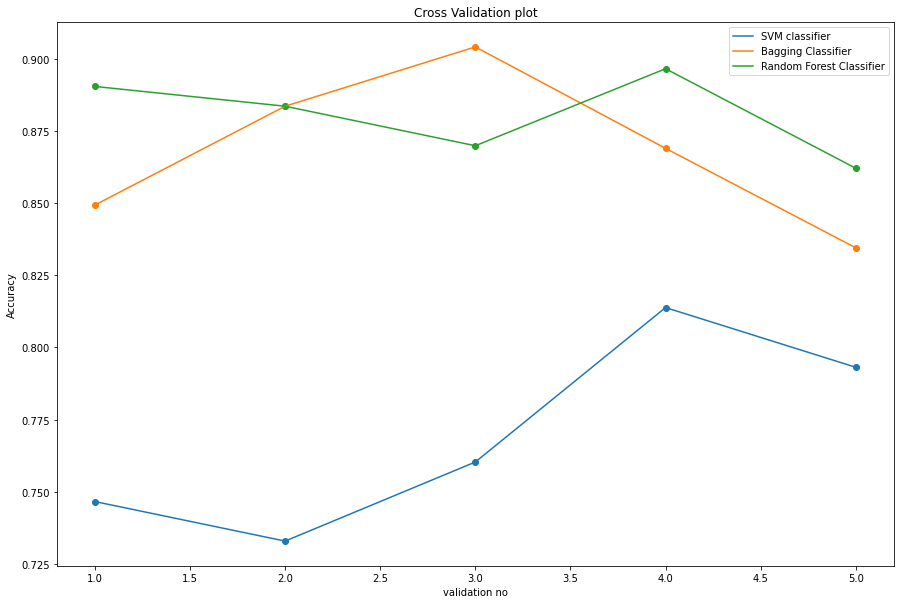

In [480]:
plt.figure(figsize=(15,10))
plt.plot(x,accuracy_svm, label = "SVM classifier")
plt.plot(x,accuracy_BC , label = "Bagging Classifier")
plt.plot(x,accuracy_RF, label = "Random Forest Classifier")
plt.scatter(x,accuracy_svm)
plt.scatter(x,accuracy_BC)
plt.scatter(x,accuracy_RF)
plt.legend()
plt.xlabel("validation no")
plt.ylabel("Accuracy")
plt.title("Cross Validation plot")

## 4) PCA from SCRATCH

In [481]:
from sklearn.decomposition import PCA

import numpy as np

class PCA_S:

  def __init__(self,n_components):
    self.n_components = n_components
    self.eigen_ve = None
    self.eigen_va = None
    self.Principal_Components = None

  def centralize(self,X):
    means = np.mean(X, axis=0)
    return (X - means)

  def fit(self,X):
    X = self.centralize(X)
    X_np = X.values
    n_samples = X_np.shape[0]

    # covariance matrix by scratch
    cov_mat = (X_np.T @ X_np) / (n_samples - 1)   

    self.eigen_va, self.eigen_ve = np.linalg.eig(cov_mat)

    #sorting eigen values
    eigenvalue_indices = np.argsort(-self.eigen_va)
    sorted_eigenvectors = np.zeros_like(self.eigen_ve)
    for i, idx in enumerate(eigenvalue_indices):
        sorted_eigenvectors[:, i] = self.eigen_ve[:, idx]
    self.eigen_va = self.eigen_va[eigenvalue_indices]
    self.eigen_ve = sorted_eigenvectors

    # Keep only the top n_components eigenvectors and eigenvalues
    self.eigen_ve = self.eigen_ve[:, :self.n_components]
    self.eigen_va = self.eigen_va[:self.n_components]

    self.Principal_Components = X_np @ self.eigen_ve


  def Transform(self,X):
    return X @ self.eigen_ve



## 5) Applying PCA -- Bar plots for Variance -- Eigenvectors plotting

In [482]:
p1 = PCA_S(n_components = 4)
p1.fit(df2)
p1.Transform(df2)
X_PCA = p1.Principal_Components
X_PCA = pd.DataFrame(X_PCA)

X_PCA

,0,1,2,3
0,0.822431,-0.728086,-1.028562,-0.609938
1,1.355463,1.250876,-0.143251,-0.087626
2,-1.140763,0.789929,0.034634,0.167904
3,1.914809,-1.313378,0.395930,0.829861
4,0.034231,-2.090014,0.023541,0.455104
...,...,...,...,...
723,0.382866,0.586397,-0.961356,0.057372
724,1.311278,-2.010615,-0.871148,0.229796
725,0.531933,-0.942110,-1.255328,-0.298586
726,-0.843300,0.315731,1.798502,-0.531781


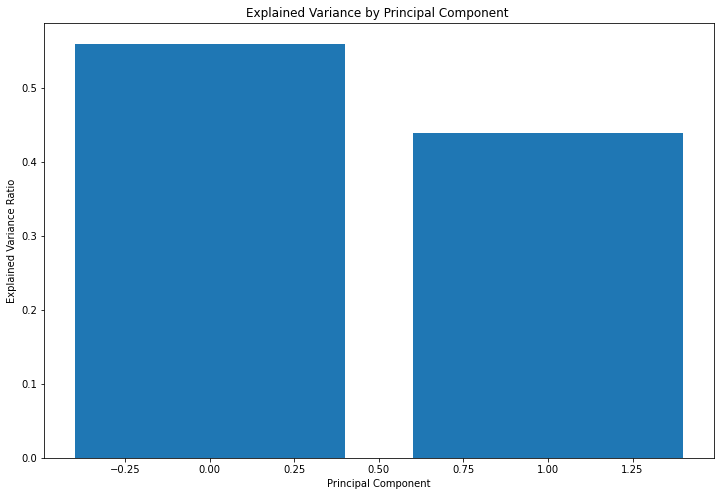

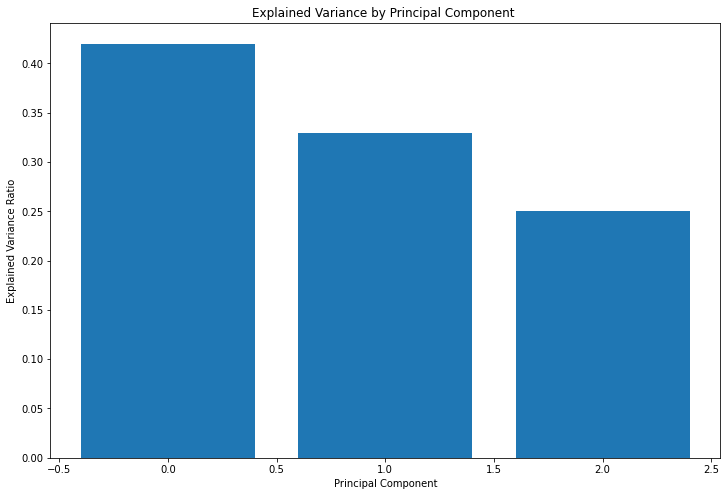

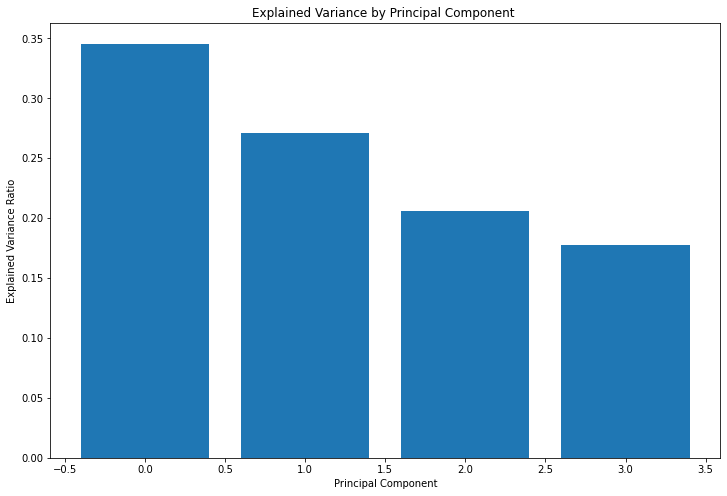

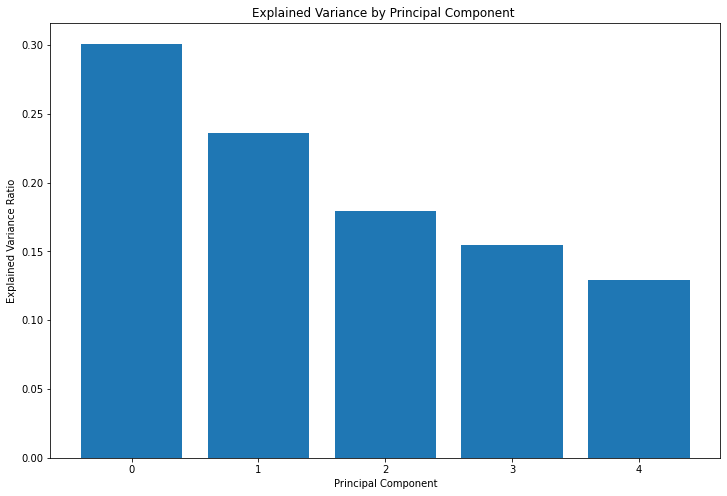

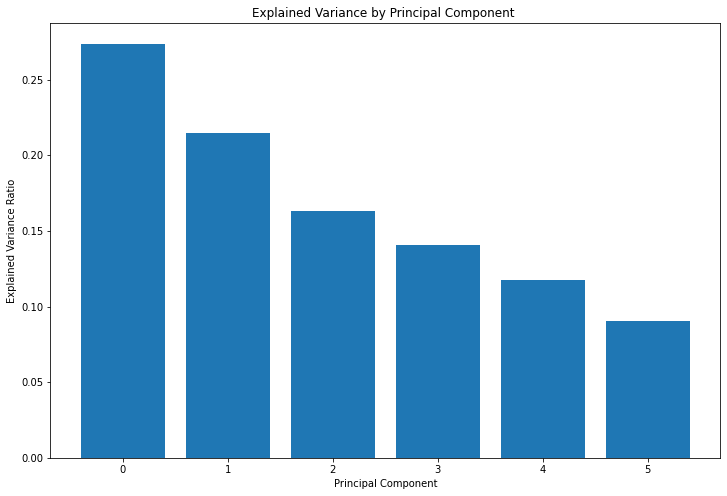

In [483]:
for i in range(2,7):
    plt.figure(figsize=(12,8))
    p = PCA_S(n_components = i)
    p.fit(df2)
    p.Transform(df2)
    # Plot the explained variance
    plt.bar(range(p.n_components), p.eigen_va / np.sum(p.eigen_va))
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title("Explained Variance by Principal Component ")
    plt.show()

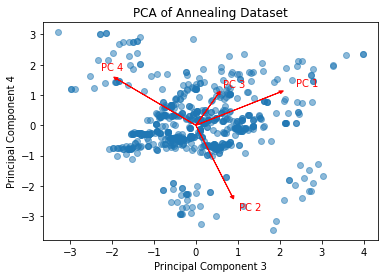

In [484]:
feat1 = 2
feat2 = 3

# Plot the data points
plt.scatter(X_PCA.iloc[:, feat1], X_PCA.iloc[:, feat2], alpha=0.5)

# Plot the eigenvectors as arrows
scale_factor = 3
for i, (eigenvector, eigenvalue) in enumerate(zip(p1.eigen_ve.T, p1.eigen_va)):
    arrow = plt.arrow(0, 0, eigenvector[feat1] * eigenvalue * scale_factor,
                      eigenvector[feat2] * eigenvalue * scale_factor,
                      color='r', head_width=0.1, head_length=0.1)
    # Add a label for the arrow
    plt.annotate('PC {}'.format(i+1), xy=(eigenvector[feat1] * eigenvalue * scale_factor,
                                           eigenvector[feat2] * eigenvalue * scale_factor),
                 xytext=(eigenvector[feat1] * eigenvalue * scale_factor * 1.2,
                         eigenvector[feat2] * eigenvalue * scale_factor * 1.2),
                 color='r')

plt.xlabel('Principal Component {}'.format(feat1+1))
plt.ylabel('Principal Component {}'.format(feat2+1))
plt.title('PCA of Annealing Dataset')
plt.show()

## 6) Classifier and 5 fold CV on PCA dataset

In [485]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_PCA, df['classes'], test_size=0.35)

### SVM Classssifier

In [486]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier1 = SVC()
classifier1.fit(X_train, y_train)
y_pred_svm_pca = classifier1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm_pca)
print('Accuracy of SVM classifier:', accuracy*100 ," %")

Accuracy of SVM classifier: 76.86274509803923  %


### Bagging Classifier

In [487]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred_BC_pca = bagging.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_BC_pca)
print('Accuracy of Bagging classifier:', accuracy1*100 ," %")

Accuracy of Bagging classifier: 81.56862745098039  %


### Random Forest Classifier

In [488]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred_RF_pca = clf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_RF_pca)
print('Accuracy of Random Forest classifier:', accuracy2*100 ," %")

Accuracy of Random Forest classifier: 86.27450980392157  %


### SVM Classifier 5-Fold CV

In [489]:
from sklearn.model_selection import KFold

X = X_PCA
y = df['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_svm = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = SVC()
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_svm.append(acc1)
    # RocCurveDisplay.from_predictions(y_test,pred_values)
avg_acc = sum(accuracy_svm)/k
max_acc=max(accuracy_svm)

print('Array of accuracies : ')
print(accuracy_svm)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.863013698630137, 0.7465753424657534, 0.7602739726027398, 0.8206896551724138, 0.7862068965517242]
Average ACC overall :
0.7953519130845537
Maximum ACC overall :
0.863013698630137


### Bagging Classifier - 5 fold CV

In [490]:
from sklearn.model_selection import KFold

X = X_PCA
y = df['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_BC = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = BaggingClassifier(max_samples=0.5, max_features=0.5)
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_BC.append(acc1)
avg_acc = sum(accuracy_BC)/k
max_acc=max(accuracy_BC)

print('Array of accuracies : ')
print(accuracy_BC)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.815068493150685, 0.8287671232876712, 0.8424657534246576, 0.8, 0.8275862068965517]
Average ACC overall :
0.8227775153519131
Maximum ACC overall :
0.8424657534246576


### Random Forest Classifier - 5 fold CV

In [491]:
from sklearn.model_selection import KFold

X = X_PCA
y = df['classes']
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_RF = []
x = [1,2,3,4,5]  
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    GNB = RandomForestClassifier(n_estimators=10)
    GNB.fit(X_train,y_train)
    pred_values = GNB.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_RF.append(acc1)
avg_acc = sum(accuracy_RF)/k
max_acc=max(accuracy_RF)

print('Array of accuracies : ')
print(accuracy_RF)

print('Average ACC overall :')
print(avg_acc)
print('Maximum ACC overall :')
print(max_acc)

Array of accuracies : 
[0.863013698630137, 0.8424657534246576, 0.863013698630137, 0.8275862068965517, 0.8620689655172413]
Average ACC overall :
0.8516296646197448
Maximum ACC overall :
0.863013698630137


### Cross Validation Plots

Text(0.5, 1.0, 'Cross Validation plot')

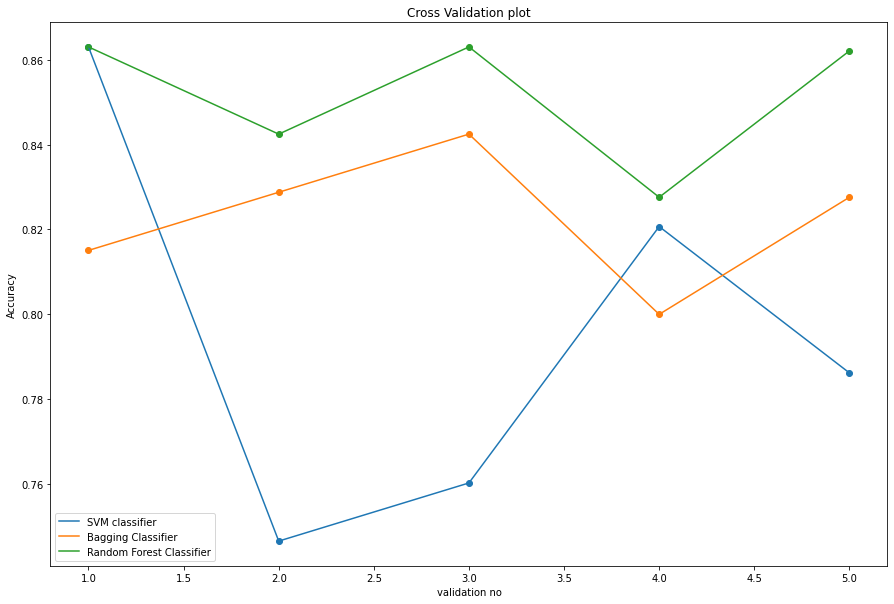

In [492]:
plt.figure(figsize=(15,10))
plt.plot(x,accuracy_svm, label = "SVM classifier")
plt.plot(x,accuracy_BC , label = "Bagging Classifier")
plt.plot(x,accuracy_RF, label = "Random Forest Classifier")
plt.scatter(x,accuracy_svm)
plt.scatter(x,accuracy_BC)
plt.scatter(x,accuracy_RF)
plt.legend()
plt.xlabel("validation no")
plt.ylabel("Accuracy")
plt.title("Cross Validation plot")

# 2)

In [493]:
Wine = pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 7/wine.csv')
Wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [494]:
Wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [495]:
Wine_features = Wine.drop(columns =['Class'],axis = 1)
Wine_Class = Wine['Class']

## 1) LDA from SCRATCH

In [496]:
import numpy as np

class LDA_S:
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X_R, y_R):

        X = X_R.values
        y = y_R.values
        # Compute the class means
        self.means_class = []
        for c in np.unique(y):
            self.means_class.append(np.mean(X[y == c], axis=0))
        self.means_class = np.array(self.means_class)
        
        # Compute the within-class scatter matrix
        self.Scatter_Mat_within = np.zeros((X.shape[1], X.shape[1]))
        for c, mean in zip(np.unique(y), self.means_class):
            self.Scatter_Mat_within += np.cov(X[y == c].T)
        
        # Compute the between-class scatter matrix
        self.Scatter_Mat_bet = np.zeros((X.shape[1], X.shape[1]))
        overall_mean = np.mean(X, axis=0)
        for i, c in enumerate(np.unique(y)):
            mean = self.means_class[i]
            n_samples = X[y == c].shape[0]
            mean_diff = (mean - overall_mean).reshape(-1, 1)
            self.Scatter_Mat_bet += n_samples * mean_diff.dot(mean_diff.T)
        
        # Compute the eigenvalues and eigenvectors of Scatter_Mat_within^-1*Scatter_Mat_bet
        Scatter_Mat_within_inv = np.linalg.inv(self.Scatter_Mat_within)
        A = Scatter_Mat_within_inv.dot(self.Scatter_Mat_bet)
        self.eigen_va, self.eigen_ve = np.linalg.eig(A)
        eigenvalue_indices = np.argsort(-self.eigen_va)
        sorted_eigenvectors = np.zeros_like(self.eigen_ve)
        for i, idx in enumerate(eigenvalue_indices):
            sorted_eigenvectors[:, i] = self.eigen_ve[:, idx]
        self.eigen_va = self.eigen_va[eigenvalue_indices]
        self.eigen_ve = sorted_eigenvectors
        
        # Select the number of components based on the explained variance
        if self.n_components is None:
            total_var = np.sum(self.eigen_va)
            cum_var = np.cumsum(self.eigen_va) / total_var
            self.n_components = np.argmax(cum_var >= 0.95) + 1
        
        # Store the eigenvectors as the transformation matrix
        self.Transform_mat = self.eigen_ve[:, :self.n_components]
        
    def transform(self, X_R):
        X = X_R.values
        return X @ self.Transform_mat

    def fit_transform(self,X,y):
        self.fit(X,y)
        return self.transform(X)

    def predict(self, X_R):
        X = X_R.values
        # Project the data onto the LDA subspace
        X_lda = X @ self.Transform_mat
        # Compute the distance between the projected data and each class mean
        dist_to_means = np.zeros((X.shape[0], len(self.means_class)))
        for i, mean in enumerate(self.means_class):
            mean_lda = mean.reshape(1, -1) @ self.Transform_mat
            dist_to_means[:, i] = np.linalg.norm(X_lda - mean_lda, axis=1)
        # Assign the test data to the class with the closest mean

        self.class_prob = np.exp(-dist_to_means)
        self.class_prob /= np.sum(self.class_prob, axis=1, keepdims=True)

        return np.argmin(dist_to_means, axis=1)+1    


In [497]:
lda = LDA_S()
lda.fit(Wine_features,Wine_Class)
A = abs(lda.transform(Wine_features))
Wine_LDA = pd.DataFrame(A)
Wine_LDA

,0,1
0,5.057531,4.481813
1,4.869041,4.286034
2,4.621894,4.327102
3,4.910007,5.053054
4,3.914420,4.085533
...,...,...
173,1.849036,4.885062
174,1.776306,4.533408
175,1.619612,4.819110
176,1.867950,4.631417


## 2) Scatter plot for visualisation transformed data

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


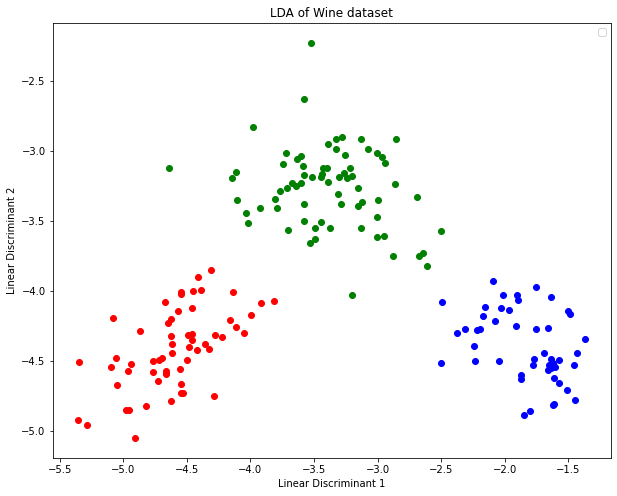

In [498]:
eigenvalues = lda.eigen_va
variance_ratio = eigenvalues / np.sum(eigenvalues)

# # Plot variance ratio for each feature
# plt.figure(figsize=(10, 5))
# plt.bar(range(Wine_features.shape[1]), variance_ratio, align='center')
# plt.xticks(range(Wine_features.shape[1]), Wine_features.columns, rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Variance Ratio')
# plt.title('Variance Ratio for each feature')
# plt.show()

# Transform data using first two linear discriminants
X_transformed = lda.transform(Wine_features)
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b','m']
for i, target_name in enumerate(Wine_Class):
  if(i<3):
    plt.scatter(X_transformed[Wine_Class == i+1, 0], X_transformed[Wine_Class == i+1, 1], c=colors[i])

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA of Wine dataset')
plt.legend()
plt.show()

In [499]:
pca1 =  PCA_S(n_components = 2)
pca1.fit(Wine_features)
Wine_PCA = pca1.Transform(Wine_features)
Wine_PCA

,0,1
0,-1067.055687,-108.516254
1,-1051.590128,-81.659406
2,-1186.553841,-80.486814
3,-1481.732848,-87.216853
4,-736.921280,-105.514118
...,...,...
173,-741.512497,-82.482987
174,-751.624313,-89.359314
175,-836.950782,-105.800408
176,-841.948950,-105.694943


## 3) Comparing PCA and LDA

With LDA

In [500]:
X_train_lda,X_test_lda,y_train_lda,y_test_lda = train_test_split(Wine_LDA, Wine_Class, test_size=0.3)

In [501]:
bagging_lda = BaggingClassifier(max_samples=0.5, max_features=0.5)
bagging_lda.fit(X_train_lda, y_train_lda)
y_pred1 = bagging_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test_lda, y_pred1)
print('Accuracy of Bagging classifier:', accuracy_lda*100 ," %")

Accuracy of Bagging classifier: 88.88888888888889  %


In [502]:
clf_lda = RandomForestClassifier(n_estimators=10)
clf_lda = clf_lda.fit(X_train_lda, y_train_lda)
y_pred2 = clf_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test_lda, y_pred2)
print('Accuracy of Random Forest classifier:', accuracy_lda*100 ," %")

Accuracy of Random Forest classifier: 100.0  %


with PCA

In [503]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(Wine_PCA, Wine_Class, test_size=0.3)


In [504]:
bagging_pca = BaggingClassifier(max_samples=0.5, max_features=0.5)
bagging_pca.fit(X_train_pca, y_train_pca)
y_pred1 = bagging_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred1)
print('Accuracy of Bagging classifier:', accuracy_pca*100 ," %")

Accuracy of Bagging classifier: 66.66666666666666  %


In [505]:
clf_pca = RandomForestClassifier(n_estimators=10)
clf_pca = clf_pca.fit(X_train_pca, y_train_pca)
y_pred2 = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred2)
print('Accuracy of Random Forest classifier:', accuracy_pca*100 ," %")

Accuracy of Random Forest classifier: 81.48148148148148  %


## 4) Table, Scatter Plot and Decision Boundary

### Bagging 

In [512]:
data = {'Transform Method': ['LDA','PCA'],
        'Accuracy':[88.88 , 66.66 ]}

data = pd.DataFrame(data)
data

,Transform Method,Accuracy
0,LDA,88.88
1,PCA,66.66


### Random Forest

In [513]:
data1 = {'Transform Method': ['LDA','PCA'],
        'Accuracy':[100 , 81.48 ]}

data1 = pd.DataFrame(data1)
data1

,Transform Method,Accuracy
0,LDA,100.00
1,PCA,81.48


<Figure size 864x576 with 0 Axes>

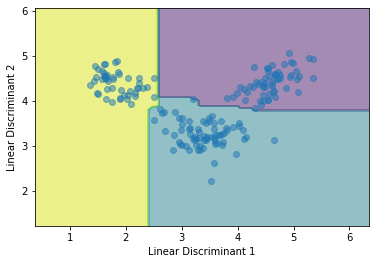

In [506]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(12,8))
disp = DecisionBoundaryDisplay.from_estimator(
    clf_lda, Wine_LDA, response_method="predict",
    xlabel='Linear Discriminant 1', ylabel='Linear Discriminant 2',
    alpha=0.5,)
plt.scatter(Wine_LDA[0],Wine_LDA[1],alpha = 0.5)

## 5) LDA as Classifier

In [507]:
lda2 = LDA_S()
lda2.fit(X_train_lda,y_train_lda)
y_pred = lda2.predict(X_test_lda)
acc_lda = accuracy_score(y_test_lda,y_pred) 
print('Accuracy of LDA classifier:', acc_lda*100 ," %")

Accuracy of LDA classifier: 100.0  %


### ROC Curve and AUC Value

In [508]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(lda_model,X_train,X_test,y_train,y_true):
    for i in range(1,4):
      y_score = LDA.class_prob
      label_binarizer = LabelBinarizer().fit(y_train)
      y_onehot_test = label_binarizer.transform(y_test)

      label_binarizer.transform([i])
      class_of_interest = i
      class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
      RocCurveDisplay.from_predictions(
                                      y_onehot_test[:, class_id],
                                      y_score[:, class_id],
                                      name=f"{class_of_interest} vs the rest",
                                      color="darkorange",
                                      )
      plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
      plt.axis("square")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.title("ROC curve (for each class)")
      plt.legend()
      plt.show()


### 5 fold cross validation with LDA With ROC CURVE

For Fold  1  ROC Curve of each class


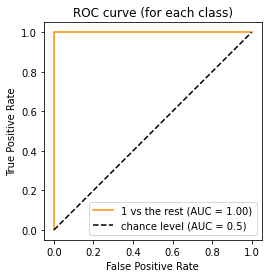

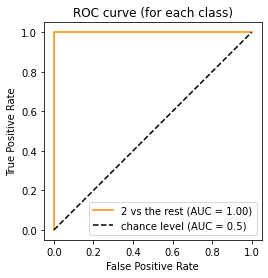

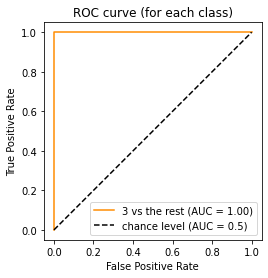

For Fold  2  ROC Curve of each class


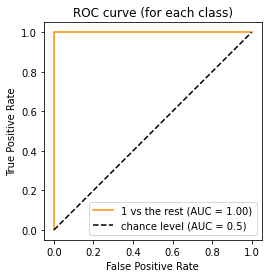

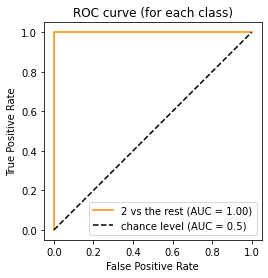

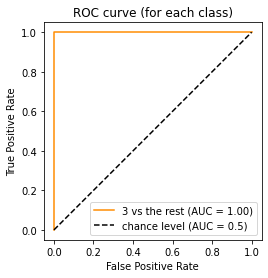

For Fold  3  ROC Curve of each class


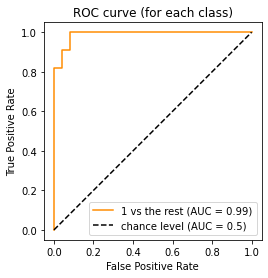

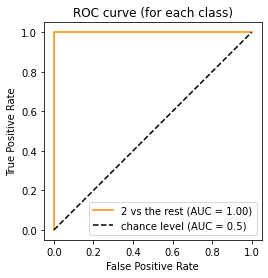

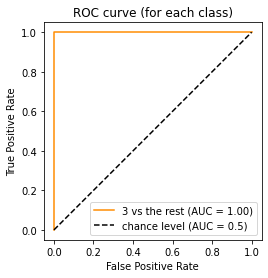

For Fold  4  ROC Curve of each class


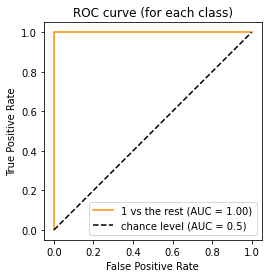

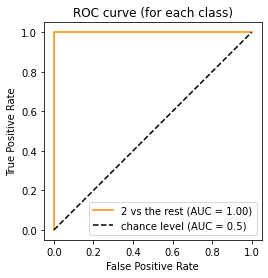

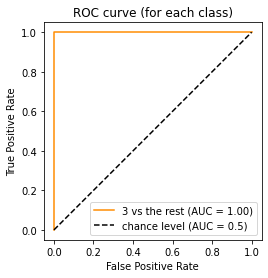

For Fold  5  ROC Curve of each class


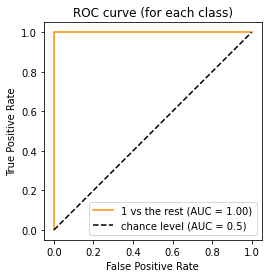

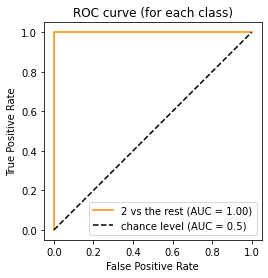

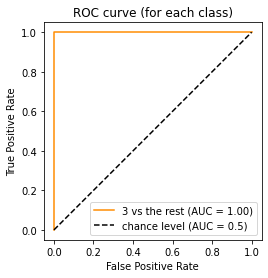

Array of accuracies of LDA Classifier: 
[1.0, 0.9722222222222222, 0.9444444444444444, 1.0, 1.0]


In [509]:
from sklearn.model_selection import KFold

X = Wine_features
y = Wine_Class
k = 5
kf = KFold(n_splits=k,shuffle = True) 
accuracy_LDA = []
x = [1,2,3,4,5]  
j = 1
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    LDA = LDA_S()
    LDA.fit(X_train,y_train)
    pred_values = LDA.predict(X_test) 
    acc1 = accuracy_score(y_test,pred_values)
    accuracy_LDA.append(acc1)
    print("For Fold ",str(j)," ROC Curve of each class")
    plot_roc_curve(LDA,X_train_lda,X_test_lda,y_train_lda,y_test_lda)
    j = j+1
avg_acc = sum(accuracy_LDA)/k
max_acc=max(accuracy_LDA)

print('Array of accuracies of LDA Classifier: ')
print(accuracy_LDA)

